In [2]:
import skimage as ski
import scipy
from skimage import morphology 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]



In [3]:
def rescale_image (image, proportion):
    return ski.img_as_ubyte(scipy.misc.imresize(image, proportion, interp ="bicubic"))

def rotate_image(image, degrees):
    return ski.img_as_ubyte(ski.transform.rotate(image, degrees, resize=True, mode='edge'))

def load_image(filename):
    return ski.img_as_ubyte(ski.io.imread(filename))

def chroma_key (background, image, initial_pos_Y, initial_pos_X):
    for i,row in enumerate(image):
        for j,pixel in enumerate(row):
            #print (pixel)
            if not(pixel [0] < 50 and pixel[1] > 200 and pixel[2] < 50):
                #print (pixel)
                background[i+initial_pos_Y,j+initial_pos_X,:3] = pixel[:3]
    return background

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


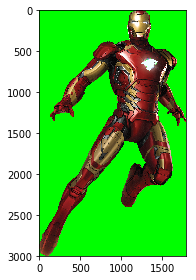

In [4]:
background = load_image("../Images/back_ground.jpg")


iron_man = load_image ("../Images/ironman.tif")
stark_symbol =  load_image ("../Images/stark_symbol.tif")
stark_symbol = rescale_image(stark_symbol, 0.23)
#ski.io.imshow(stark_symbol)
iron_man = chroma_key (iron_man, stark_symbol, 580, 1240) 
ski.io.imshow(iron_man)


iron_man = rescale_image(iron_man, 1/7)
background = chroma_key (background, iron_man, 300, 500)

#equalizing ironman crop on background
#mask = np.zeros(( 1080, 1920))
#mask[300:300+iron_man.shape[0],500:500+iron_man.shape[1]] = 1
#background = ski.exposure.equalize_hist(background, nbins=256, mask = mask)

ski.io.imsave("teste.png",background)

